In [2]:
path = "https://raw.githubusercontent.com/Kamil128/Learning_repo/main/ML_Classification/data/titanic_train.csv"

In [3]:
import pandas as pd

df = pd.read_csv(path)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
col_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(col_to_drop, axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int', errors='ignore')
df['Embarked'] = df['Embarked'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 31.9 KB


In [11]:
df.describe(include='category')

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


In [12]:
df.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [13]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=y)

In [15]:
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


num_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='median')),
     ('standard_scaller', StandardScaler()),
    ]
)

cat_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('standard_scaller', OneHotEncoder()),
    ]
)

cat_num_pipeline = ColumnTransformer(
    transformers=
    [
     ('numerical', num_pipeline, num_attr),
     ('categorical', cat_pipeline, cat_attr)
    ]
)


In [17]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,male,NaN,0,0,56.4958,S
481,2,male,NaN,0,0,0.0000,S
527,1,male,NaN,0,0,221.7792,S
855,3,female,18.0,0,1,9.3500,S
801,2,female,31.0,1,1,26.2500,S
...,...,...,...,...,...,...,...
359,3,female,NaN,0,0,7.8792,Q
258,1,female,35.0,0,0,512.3292,C
736,3,female,48.0,1,3,34.3750,S
462,1,male,47.0,0,0,38.5000,S


In [18]:
pd.DataFrame(cat_num_pipeline.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.081135,-0.465084,-0.466183,0.513812,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.081135,-0.465084,-0.466183,-0.662563,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.081135,-0.465084,-0.466183,3.955399,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.887827,-0.465084,0.727782,-0.467874,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.110934,0.478335,0.727782,-0.115977,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,-0.081135,-0.465084,-0.466183,-0.498500,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
708,0.418245,-0.465084,-0.466183,10.005329,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
709,1.417007,0.478335,3.115713,0.053205,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
710,1.340179,-0.465084,-0.466183,0.139097,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [19]:
cat_num_pipeline.transformers_[1][1]['standard_scaller'].categories_

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [20]:
X_tr = cat_num_pipeline.fit_transform(X_train)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_tr, y_train)

LogisticRegression()

In [22]:
X_test_tr = cat_num_pipeline.transform(X_test)
y_pred = model.predict(X_test_tr)

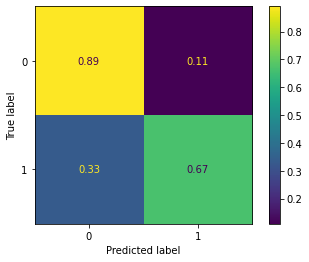

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

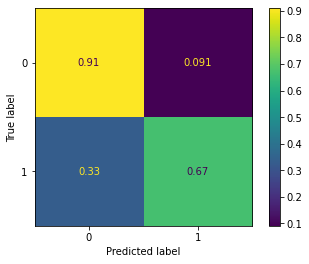

In [24]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_tr, y_train)

y_pred_svm = model_svm.predict(X_test_tr)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, normalize='true')

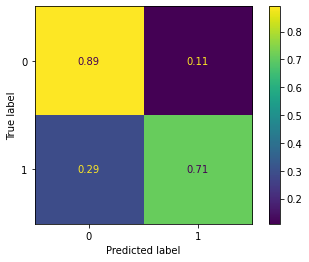

In [25]:
model_svm = SVC(C=0.2)
model_svm.fit(X_tr, y_train)

y_pred_svm = model_svm.predict(X_test_tr)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, normalize='true')